### **Importações**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:
#Importação do dataset de treino
file_path = r'Treino.csv'
df_treino = pd.read_csv(file_path)
df_treino = df_treino.astype(int)
display(df_treino.head())

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
0,-1,0,1,1,1,-1,1,-1,0,1
1,-1,1,-1,0,0,-1,1,1,1,1
2,-1,0,1,1,1,1,-1,0,-1,1
3,1,-1,1,1,0,-1,1,-1,0,1
4,-1,0,-1,1,1,1,0,-1,1,1


In [4]:
# Importação dos dataset de validacao e teste
file_path = r'Validacao.csv'
df_validacao = pd.read_csv(file_path)
df_validacao = df_validacao.astype(int)
display(df_validacao.head())

file_path = r'Teste.csv'
df_teste = pd.read_csv(file_path)
df_teste = df_teste.astype(int)
display(df_teste.head())

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
0,1,1,1,0,-1,1,-1,0,-1,1
1,1,0,1,-1,1,0,1,-1,-1,1
2,1,-1,1,-1,0,1,0,-1,1,1
3,-1,-1,0,0,1,-1,1,1,1,1
4,-1,0,1,1,1,0,1,-1,-1,1


,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
0,1,0,0,1,-1,1,1,-1,-1,1
1,-1,-1,1,1,1,1,-1,1,-1,1
2,1,1,-1,-1,1,1,-1,1,-1,1
3,0,0,0,1,1,1,-1,-1,0,1
4,1,-1,0,1,-1,1,1,0,-1,1


In [5]:
df_treino.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,0.013445,0.024370,0.031092,0.007563,0.006723,0.035294,0.028571,0.031933,0.062185,0.537815
std,0.818101,0.813207,0.831391,0.809392,0.848462,0.814357,0.829963,0.819642,0.820981,1.151223
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [8]:
df_treino['Resultado'].value_counts()

Resultado
 1    320
-1    320
 2    320
 0    230
Name: count, dtype: int64

In [9]:
df_validacao.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,-0.026846,-0.060403,0.167785,0.040268,0.134228,0.067114,-0.046980,-0.060403,-0.020134,0.536913
std,0.829737,0.807299,0.808759,0.829190,0.810886,0.794104,0.824749,0.815626,0.842052,1.153862
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [10]:
df_validacao['Resultado'].value_counts()

Resultado
 1    40
-1    40
 2    40
 0    29
Name: count, dtype: int64

In [11]:
df_teste.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.046980,0.087248,-0.093960,0.067114,0.107383,0.154362,0.046980,-0.080537,-0.053691,0.536913
std,0.856892,0.779231,0.791358,0.843612,0.863219,0.811445,0.856892,0.818013,0.875995,1.153862
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [12]:
df_teste['Resultado'].value_counts()

Resultado
 1    40
-1    40
 2    40
 0    29
Name: count, dtype: int64

#### **Treino**

In [13]:
# Filtrando as features que serão passadas para predição
X = df_treino.drop(columns=['Resultado'])
X

,J1,J2,J3,J4,J5,J6,J7,J8,J9
0,-1,0,1,1,1,-1,1,-1,0
1,-1,1,-1,0,0,-1,1,1,1
2,-1,0,1,1,1,1,-1,0,-1
3,1,-1,1,1,0,-1,1,-1,0
4,-1,0,-1,1,1,1,0,-1,1
...,...,...,...,...,...,...,...,...,...
1185,0,0,0,0,0,0,0,0,0
1186,1,0,-1,0,0,0,0,0,0
1187,0,0,0,0,0,0,0,0,0
1188,0,0,0,0,0,0,1,0,0


In [14]:
# Obtendo as labels do dataset de treino
Y = df_treino['Resultado'].values
Y

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

##### **Uso de heurística para determinar o K**

**Regra da Raiz Quadrada**

In [15]:
from math import sqrt,ceil

# Arrendondando a raiz quadrada do total de entradas do dataset de treino

k = ceil(sqrt(df_treino['J1'].count())) 
print("Quantidade vizinhos: {}".format(k))

# Criação do classificador
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

# Treino do modelo
clf.fit(X.values, Y)

score = cross_val_score(clf, X.values, Y, cv=5, scoring=None)
print("K={}, Acurácia média: {}".format(k,score.mean()))

Quantidade vizinhos: 35
K=35, Acurácia média: 0.842016806722689


**Definição a partir do tamanho do dataset**

In [16]:
qtd_amostras = df_treino['J1'].count()
k = ceil(0.02 * qtd_amostras)  # 2% do número total de amostras
print("Tamanho do dataset: {}\nValor K: {}".format(qtd_amostras,k))

# Criação do classificador
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

# Treino do modelo
clf.fit(X.values, Y)

score = cross_val_score(clf, X.values, Y, cv=5, scoring=None)
print("K={}, Acurácia média: {}".format(k,score.mean()))

Tamanho do dataset: 1190
Valor K: 24
K=24, Acurácia média: 0.8983193277310925


**Cross-Validation**

In [17]:
# Lista para guardar os resultados dos testes para k
lista_k_accuracy = []

# Criação do classificador
for k in range(1,21):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)

    # Treino do modelo
    clf.fit(X.values, Y)

    score = cross_val_score(clf, X.values, Y, cv=5, scoring=None)
    lista_k_accuracy.append([k,score.mean()])

In [18]:
# Tranformando a lista de acurácias em um array 20x2
array_acuracia = np.array(lista_k_accuracy)

# Obtendo o k a partir da maior acurácia continda na segunda coluna da matriz
k = np.argmax(array_acuracia[:, 1])

# Obtendo o valor da acurácia na posição do k
accuracia = array_acuracia[k][1]

print("K={}, Acurácia média: {}".format(k,accuracia))

K=2, Acurácia média: 0.9436974789915966


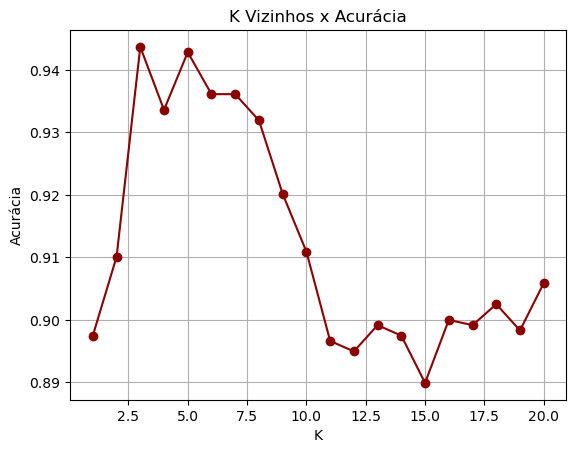

In [19]:
# Separando em listas separadas para o eixo x e y
x = [par[0] for par in lista_k_accuracy]
y = [par[1] for par in lista_k_accuracy]

# Plotar o gráfico de linha
plt.plot(x, y, marker='o',color='darkred') 

# Adicionar título e rótulos
plt.title('K Vizinhos x Acurácia')
plt.xlabel('K')
plt.ylabel('Acurácia')

# Mostrar o gráfico
plt.grid(True)
plt.show()


In [20]:
# Quantidade de vizinhos definido a partir da heurística que possibilitou a melhor acurácia
k = 2

# Criação do classificador
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

# Treino do modelo
clf.fit(X.values, Y)

KNeighborsClassifier(n_neighbors=2)

#### **Validação**

In [21]:
# Filtrando as features que serão passadas para predição
X_valid = df_validacao.drop(columns=['Resultado'])
X_valid = X_valid.values
X_valid

array([[ 1,  1,  1, ..., -1,  0, -1],
       [ 1,  0,  1, ...,  1, -1, -1],
       [ 1, -1,  1, ...,  0, -1,  1],
       ...,
       [-1,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  1,  1],
       [ 0,  0,  1, ...,  1,  1, -1]])

In [22]:
# Obtendo as labels do dataset de validação
Y_valid = df_validacao.drop(columns=['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9'])['Resultado'].values
Y_valid

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [23]:
# Criação das predições a partir da base de validação
predicao = clf.predict(X_valid)

# Calculando a acurácia
acuracia = accuracy_score(Y_valid, predicao)
print("Acurácia: {:.2f}".format(acuracia))


Acurácia: 0.89


#### **Teste**

In [24]:
# Filtrando as features que serão passadas para predição
X_test = df_teste.drop(columns=['Resultado'])
X_test = X_test.values
X_test

array([[ 1,  0,  0, ...,  1, -1, -1],
       [-1, -1,  1, ..., -1,  1, -1],
       [ 1,  1, -1, ..., -1,  1, -1],
       ...,
       [ 0,  0,  0, ...,  0,  0,  1],
       [-1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [25]:
# Obtendo as labels do dataset de teste
Y_test = df_teste.drop(columns=['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9'])['Resultado'].values
Y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [26]:
# Criação das predições a partir da base de validação
predicao = clf.predict(X_test)

print(predicao)

# Calculando a acurácia
acuracia = accuracy_score(Y_test, predicao)
print("Acurácia: {:.2f}".format(acuracia))

[ 1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  2  2 -1  2  1  2  2  2  2  2  2
  1  2  2  2  2  2  2  2  2 -1  2  2  2  1  2  2  2  2  2  2  2  2  2 -1
  2  2  2  2  2]
Acurácia: 0.93


In [27]:
# Nomes das classes
nomes_classes = ["O ganhou","Ainda tem jogo","X ganhou","Empate"]

# Calcular e imprimir o relatório de classificação
relatorio_classificacao = classification_report(Y_test, predicao, target_names=nomes_classes)
print("Relatório de Classificação:\n", relatorio_classificacao)

Relatório de Classificação:
                 precision    recall  f1-score   support

      O ganhou       0.83      1.00      0.91        40
Ainda tem jogo       1.00      1.00      1.00        29
      X ganhou       0.92      0.88      0.90        40
        Empate       1.00      0.85      0.92        40

      accuracy                           0.93       149
     macro avg       0.94      0.93      0.93       149
  weighted avg       0.93      0.93      0.93       149



### **Partida**

In [28]:
import numpy as np
import random

### **Função para plotagem do tabuleiro**

In [29]:
import matplotlib.pyplot as plt

def plot_board(board,predicao=None):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.text(-0.25, 2.5, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 1.5, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 0.5, '3', fontsize=42, ha='center', va='center', color='black')

    ax.text(0.5, 3.25, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(1.5, 3.25, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(2.5, 3.25, '3', fontsize=42, ha='center', va='center', color='black')

    plt.plot([1, 1], [0, 3], color='black', linewidth=2)
    plt.plot([2, 2], [0, 3], color='black', linewidth=2)
    plt.plot([0, 3], [1, 1], color='black', linewidth=2)
    plt.plot([0, 3], [2, 2], color='black', linewidth=2)

    for i in range(3):
        for j in range(3):
            mark = board[i][j]
            if mark == 1:
                plt.text(j + 0.5, 2.5 - i, 'X', fontsize=42, ha='center', va='center', color='black')
            elif mark == -1:
                plt.text(j + 0.5, 2.5 - i, 'O', fontsize=42, ha='center', va='center', color='black')

    if predicao is not None:
        plt.text(1.5, -0.5, 'Status: ' + predicao, fontsize=42, ha='center', va='center', color='black')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


##### **Funções para realização de jogadas**

In [30]:
# Função para coleta da jogada
def coleta_jogada():
    # Coletando os valores por meio de um input
    linha, coluna = input("Informe a linha e a coluna onde deseja incluir o x. Ex: [1,2]").split(",")
    
    # Convertendo os valores para inteiro
    return int(linha), int(coluna)

# Função para validação da posição informada para realização da jogada
def valida_jogada(jogada,linha,coluna):
    
    # Conversão da jogada em um array 3x3
    jogada = np.array(jogada).reshape(3,3)

    print("Linha:",linha)
    print("Linha:",coluna)
        
    # Verificar se o valor na posição especificada é igual a zero
    if jogada[linha-1][coluna-1] == 0:
        return True
    
    return False
    

# Função para realização da jogada do computador a partir de uma função aleatória
def jogada_COM(jogada):
    jogada_feita = False
    
    while not jogada_feita: 
        # Escolha de um índices de linha e coluna na lista
        linha = random.randint(0,2)
        coluna = random.randint(0,2)

        # Caso a posição escolhida esteja livre realiza a modificação
        if jogada[linha][coluna] not in [1,-1]:
            # Atrubuição realizada na posição aleatória escolhida
            jogada[linha,coluna] = -1
            jogada_feita = True
        
    return jogada


def ajuste_jogada(jogada,linha,coluna):
    # Conversão da jogada em um array 3x3
    jogada = np.array(jogada).reshape(3,3)

    # Substituindo o valor da posição informada em 1
    jogada[linha-1,coluna-1] = 1

    return jogada

#### **Realização da partida**

In [34]:
from IPython.display import clear_output

# Convertendo a lista de jogadas em um array 3x3
jogada = [0,0,0,0,0,0,0,0,0]
jogada = np.array(jogada).reshape(3,3)
plot_board(jogada)

finalizar_jogo = False

print("=====================================\n")

while not finalizar_jogo:
    # Plotando o tabuleiro 
    # plot_board(jogada)
    print(np.array(jogada).reshape(3,3))
    
    # Limpando o prompt
    clear_output(wait=True)
    
    # Coletando a jogada
    linha,coluna = coleta_jogada()
    
    # Chamando a função de validação de jogada
    if valida_jogada(jogada,linha,coluna):
        # Realizando o ajuste da jogada a partir das posições de inserção informadas
        jogada = ajuste_jogada(jogada,linha,coluna)
        plotJogada = jogada
        print('Jogada realizada!')
    else:
        print("Jogada não realizada")
        continue # Recomeça solicitando a jogada para o usuário
    
    # Redefinindo o shape do array 2d para usar no classificador
    jogada = jogada.reshape(9,).reshape(1,-1)

    # Obtenção do status do jogo após jogada do usuário
    predicao = clf.predict(jogada)


    # PRINT PARA APAGAR DEPOIS
    print(np.array(jogada).reshape(3,3))
    print("Situação jogo: {}".format(predicao))
    print("=====================================\n")
    
    # Caso haja um vencedor o loop será encerrado
    if str(predicao) != "[2]":
        finalizar_jogo = True
    
    jogada = jogada.reshape(3,3)

    # Plotando o tabuleiro 
    # plot_board(plotJogada,predicao)

    # Realização de jogada da máquina
    jogada = jogada_COM(jogada)

    # Redefinindo o shape do array para usar no classificador
    jogada = jogada.reshape(9,).reshape(1,-1)

    # Obtenção do status do jogo após jogada da máquina
    predicao = clf.predict(jogada)

    # Plotando o tabuleiro 
    # plot_board(jogada,predicao)

    # PRINT PARA APAGAR DEPOIS
    print(np.array(jogada).reshape(3,3))
    print("Situação jogo: {}".format(predicao))
    print("=====================================\n")
    
    # Caso haja um vencedor o loop será encerrado
    if str(predicao) != "[2]":
        finalizar_jogo = True

    # Plotando o tabuleiro 
    # plot_board(jogada,predicao)

Linha: 3
Linha: 3
Jogada realizada!
[[ 1  0 -1]
 [ 0  1  0]
 [ 0 -1  1]]
Situação jogo: [1]

[[ 1  0 -1]
 [ 0  1  0]
 [-1 -1  1]]
Situação jogo: [1]

